# INTRODUCTION

In this third notebook, the focus is entirely on K-means clustering. For a comprehensive understanding of the model, it is recommended to review the previous notebooks on [EDA](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights) and [PCA](https://www.kaggle.com/code/tarktunataalt/global-prosperity-pca-distance-insights).

The EDA notebook includes various visualizations that provide an overview of the dataset, such as:
- Boxplots for understanding the distribution of each variable.
- Correlation heatmaps to examine relationships between variables.
- Histograms and density plots for individual variable analysis.

In the PCA notebook, PCA was applied to the scaled data, revealing that the scaled data provided the best clustering. The Euclidean distance was chosen as the appropriate distance metric due to its effectiveness in capturing the data's structure.

For the PCA and subsequent analyses, the 'Country' variable was set as the index, and the 'AverageScore' was excluded as it represents a summary measure of the other variables.

In this notebook, K-means clustering is explored, building on the insights gained from the EDA and PCA analyses. The primary goal is to identify meaningful clusters within the dataset and interpret the underlying patterns. In the subsequent notebook, K-medoids clustering will be examined to further enhance the understanding of the data's structure.

Additionally, it should be noted that the `factoextra` library does not run directly on Kaggle. Hence, the code was executed locally, and the results were uploaded to Kaggle. It is recommended to download the notebook and run it locally for similar analyses.

- **[EDA Notebook](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights):** For a comprehensive overview of the dataset and its key features.
- **[PCA Notebook](https://www.kaggle.com/code/tarktunataalt/global-prosperity-pca-distance-insights):** To understand the application of PCA and the selection of the distance metric.
- **[K-Medoids Clustering](https://www.kaggle.com/code/tarktunataalt/k-medoids-clustering-global-prosperity-2023):** To provide an alternative clustering method that is less sensitive to outliers.


In [1]:
library(factoextra)
library(dplyr)
library(tibble)
library(gridExtra)
library(rnaturalearth)
library(rnaturalearthdata)
library(ggplot2)
library(sf)
library(stringr)

data=read.csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")
data <- data %>%
  column_to_rownames(var = "Country")
data=data[,2:13]
scaled_pca_data <- prcomp(data, center = TRUE, scale. = TRUE)
scaled_pca_data <- scaled_pca_data$x[,1:2]

Zorunlu paket yükleniyor: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa





Attaching package: ‘dplyr’





The following objects are masked from ‘package:stats’:



    filter, lag





The following objects are masked from ‘package:base’:



    intersect, setdiff, setequal, union







Attaching package: ‘gridExtra’





The following object is masked from ‘package:dplyr’:



    combine







Attaching package: ‘rnaturalearthdata’





The following object is masked from ‘package:rnaturalearth’:



    countries110





Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE




# OPTIMAL NUMBER OF CLUSTERS FOR K-MEANS

## Elbow Method


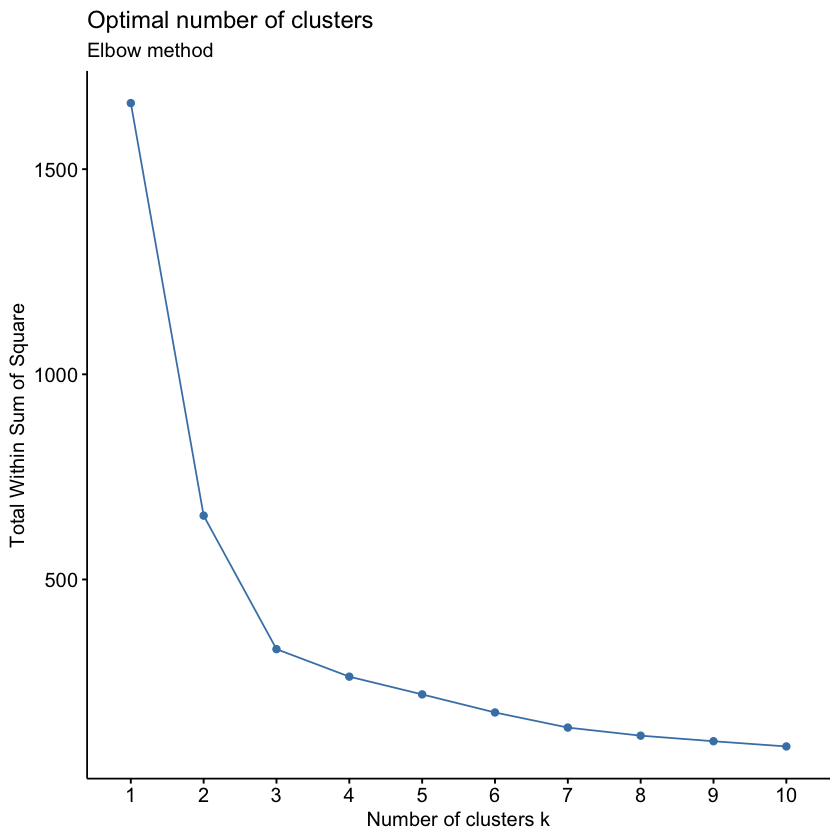

In [2]:
fviz_nbclust(scaled_pca_data,kmeans,method = "wss",nstart = 25)+
  labs(subtitle = "Elbow method")

The elbow method graph shows a significant bend (or "elbow") at k=3, indicating that 3 clusters might be optimal. The total within-cluster sum of squares drops sharply at this point and then begins to level off, suggesting that adding more clusters beyond this point does not significantly improve the variance explained.

## Silhouette Method

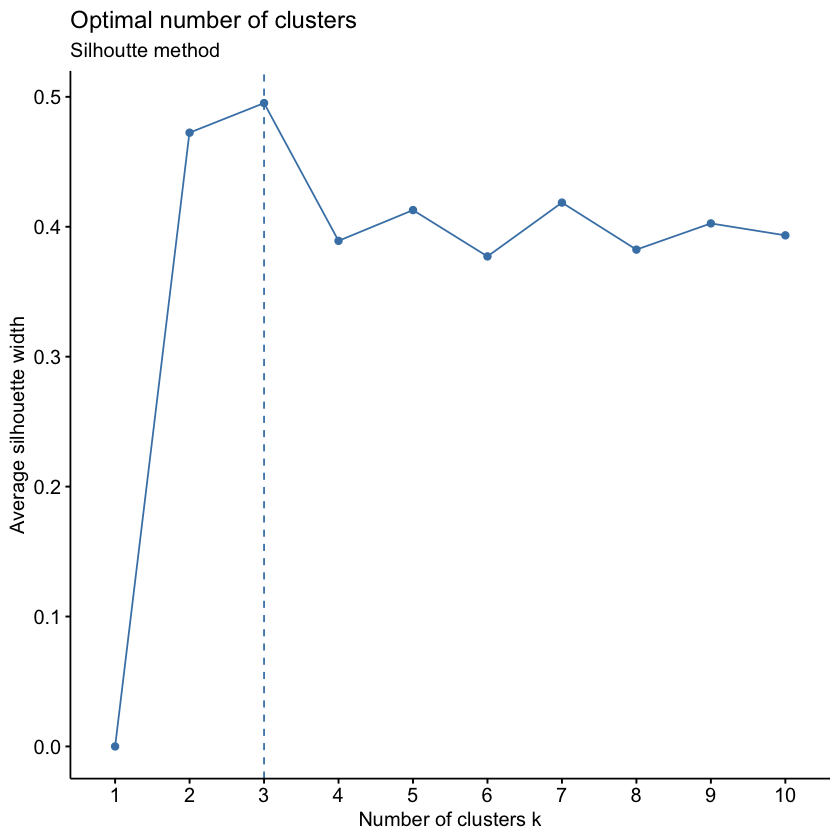

In [3]:
fviz_nbclust(scaled_pca_data,kmeans,method = "silhouette")+ #for average silhouette width
  labs(subtitle = "Silhoutte method")

The silhouette method indicates the average silhouette width for different numbers of clusters. Although the maximum silhouette width is observed at k=3, the silhouette method generally shows a tendency to indicate k=2. Therefore, it is not considered as a primary determinant in this analysis. Additionally, the silhouette method also suggests that 
k=5 and k=7 could be meaningful, showing reasonably high silhouette widths.

## Gap Statistic Method

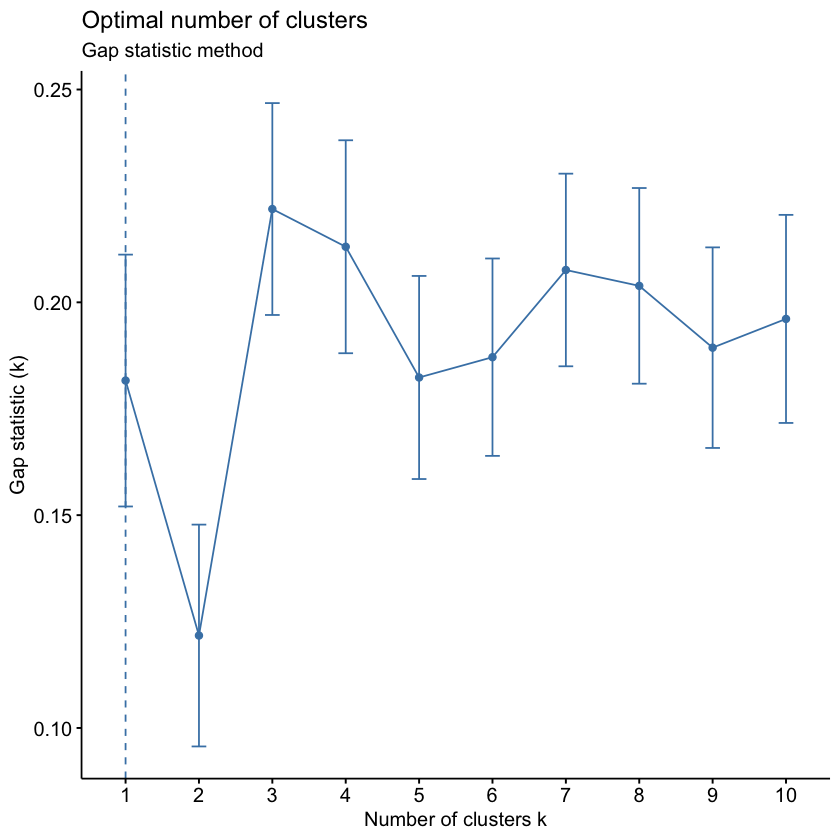

In [4]:
fviz_nbclust(scaled_pca_data, kmeans, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method") 

The gap statistic method compares the log of within-cluster dispersion with that expected under a null reference distribution of the data. In this graph, k=3 also shows a significant gap, suggesting that 3 clusters might be optimal. However, there are also noticeable gaps at higher values such as k=7, indicating that more clusters might also be meaningful to explore.

## General Conclusion

Considering the elbow, silhouette, and gap statistic methods, it is suggested that 3 clusters are the most optimal for this dataset. However, the silhouette and gap statistic methods also suggest exploring 7 clusters could provide additional insights. Therefore, further analysis will be conducted with 3 and 7 clusters to determine the most meaningful cluster structure. The primary focus will be on 3 clusters, with 7 clusters being explored as an alternative.

# K-MEANS

## FOR 3 CLUSTERS

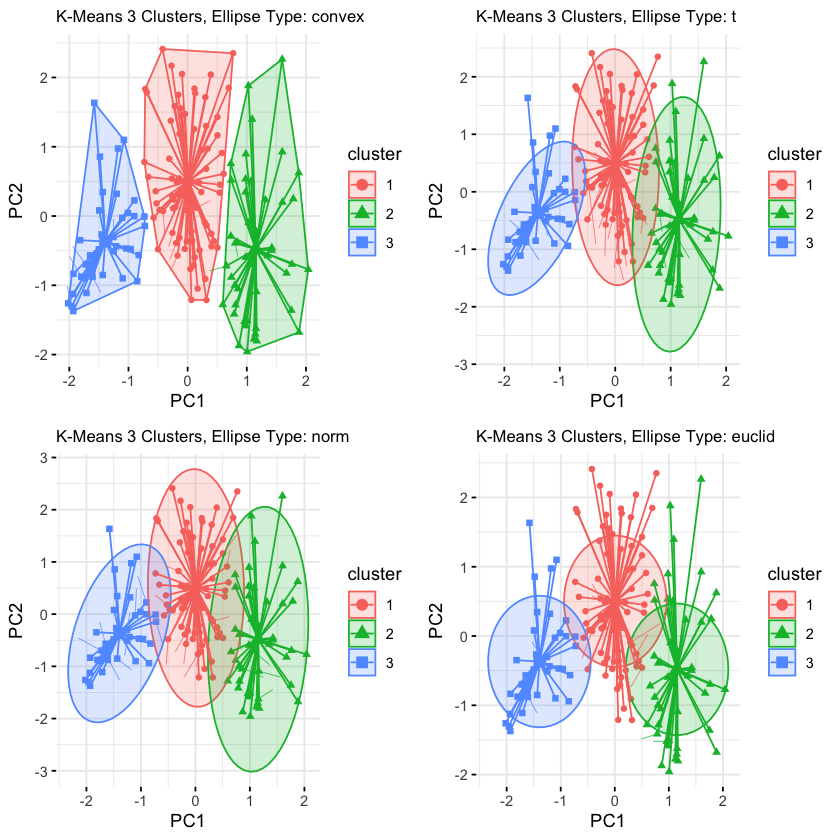

In [5]:
km_res_3 <- kmeans(scaled_pca_data, 3, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
k_3plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(km_res_3, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Means 3 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  k_3plots[[etype]] <- p
}

grid.arrange(grobs = k_3plots, ncol = 2)

The visualization of K-Means clustering with 3 clusters using different ellipse types shows the general distribution and separation of the clusters. Each plot, whether using convex, t, norm, or Euclid ellipses, demonstrates that while clusters are forming, there is some degree of overlap between them.

The Euclid ellipse type, which aligns with the distance metric used in K-Means clustering, offers the most distinct representation of the clusters, even though overlaps are still present. This indicates that while the clustering captures significant patterns in the data, some similarities between clusters persist. Overall, the clusters are reasonably well-formed, and the visualizations provide a clear understanding of their distribution.

In conclusion, the clustering shows meaningful separation, and the Euclid ellipse type provides a particularly clear view of the cluster boundaries. Further analysis and refinement could improve the distinctness of the clusters, but the current results suggest that three clusters are a reasonable choice for this dataset.

## FOR 7 CLUSTERS

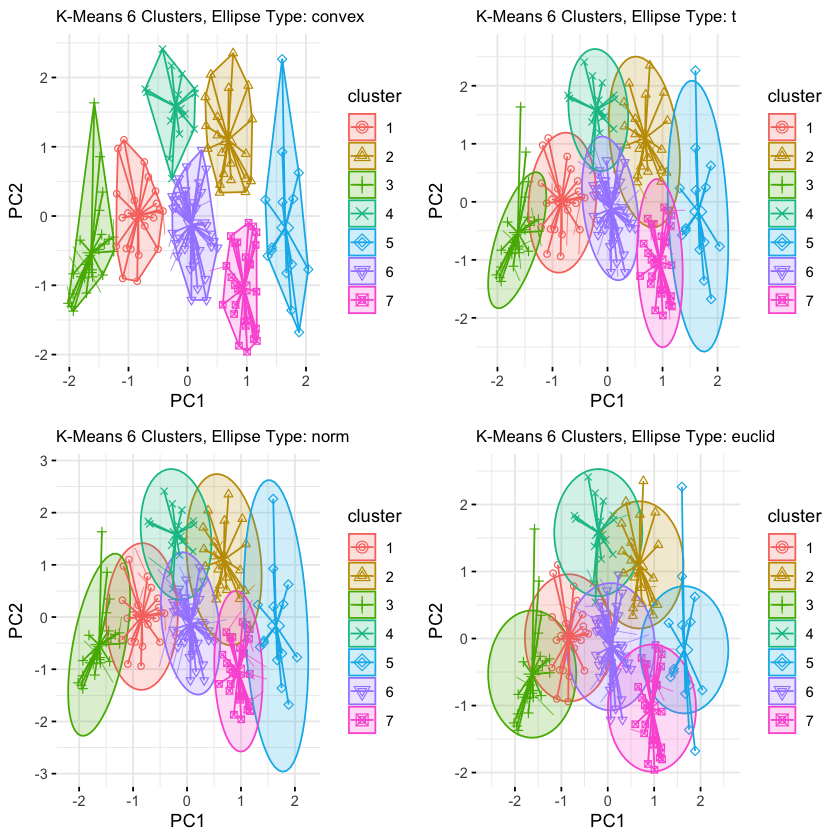

In [6]:
km_res_7 <- kmeans(scaled_pca_data, 7, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
k_7plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(km_res_7, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Means 6 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  k_7plots[[etype]] <- p
}

grid.arrange(grobs = k_7plots, ncol = 2)

The visualization of K-Means clustering with 7 clusters using various ellipse types—convex, t, norm, and Euclid—illustrates a more complex distribution and less distinct separation compared to the 3-cluster scenario. The increased number of clusters results in greater overlap among them, making it challenging to clearly differentiate each cluster.

The Euclid ellipse type, while providing a more consistent representation aligned with the distance metric used in clustering, still shows significant overlap. This indicates that while the clustering algorithm identifies distinct groupings, the data's inherent similarities lead to blurred boundaries between some clusters.

Overall, the clusters are not as distinctly separated, suggesting that 7 clusters may introduce more complexity than clarity. However, the results still provide valuable insights into the data's structure, highlighting areas where clusters are more densely packed or significantly overlapping. Further refinement and analysis might be necessary to achieve clearer separation, but the current visualization suggests that fewer clusters might offer more distinct groupings.

# CONCLUSION

The analysis indicated that 3 clusters were optimal based on the Elbow, Silhouette, and Gap statistic methods. The evaluation of the clusters was performed using the K-Means algorithm on the PCA-transformed data. The graphical representation of the clusters shows that the 3 clusters are well-separated, confirming their distinct characteristics


In [7]:
summary(data)
aggregate(data, by=list(km_res_3$cluster), mean)  
aggregate(data, by=list(km_res_3$cluster), sd)


 SafetySecurity  PersonelFreedom   Governance    SocialCapital  
 Min.   :16.54   Min.   :16.16   Min.   :13.09   Min.   :23.01  
 1st Qu.:59.29   1st Qu.:39.65   1st Qu.:37.47   1st Qu.:47.82  
 Median :68.93   Median :57.17   Median :47.51   Median :54.39  
 Mean   :67.24   Mean   :56.83   Mean   :50.36   Mean   :54.47  
 3rd Qu.:80.56   3rd Qu.:72.86   3rd Qu.:60.97   3rd Qu.:60.61  
 Max.   :96.32   Max.   :94.10   Max.   :90.41   Max.   :82.56  
 InvestmentEnvironment EnterpriseConditions MarketAccessInfrastructure
 Min.   :21.69         Min.   :20.50        Min.   :24.23             
 1st Qu.:40.77         1st Qu.:45.83        1st Qu.:40.05             
 Median :51.25         Median :53.52        Median :56.59             
 Mean   :53.01         Mean   :54.79        Mean   :55.02             
 3rd Qu.:64.64         3rd Qu.:62.76        3rd Qu.:69.06             
 Max.   :84.99         Max.   :83.84        Max.   :85.75             
 EconomicQuality LivingConditions     Health    

Group.1,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67.37403,52.41312,46.87416,54.21000,52.53675,53.43519,56.74091,51.17883,73.52948,71.50831,61.32636,53.71182
2,50.89102,43.24735,34.54122,46.13449,34.93755,43.01388,35.79245,37.96449,45.56184,54.60612,35.11265,51.06796
3,86.53756,81.35561,75.81317,64.91220,75.51244,71.41512,74.76610,68.55951,91.77683,79.96390,82.05415,67.13561


Group.1,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.489678,16.162769,8.509883,7.087530,8.240463,7.479682,8.004260,8.338165,9.829504,4.899916,10.340717,6.479389
2,16.086650,12.214357,8.559958,7.442817,7.004395,7.247080,5.643467,5.718043,12.442174,7.858516,10.303038,6.733957
3,6.951019,9.507296,9.357966,9.256692,7.484437,7.874884,4.925082,7.350090,2.889432,3.030424,4.766813,6.309125


* **Cluster 1 - Developing Nations**:
This cluster includes countries with moderate scores across most dimensions. The average scores for safety and security, personal freedom, and governance are balanced, indicating a transitional state of development. Economic quality and living conditions are relatively strong, suggesting a decent standard of living and economic environment. The standard deviation values suggest moderate variability within this cluster, with countries having consistent scores across different dimensions. This cluster can be named "Developing Nations," representing countries that are progressing towards higher levels of prosperity but still face significant challenges.

* **Cluster 2 - Underdeveloped Nations**:
Countries in this cluster exhibit lower scores across most dimensions compared to Cluster 1. The average scores for safety and security, governance, and economic quality are notably lower, reflecting substantial challenges in these areas. Personal freedom and social capital are also lower, indicating issues related to individual liberties and societal trust. The higher standard deviation values in this cluster indicate greater variability among countries, highlighting significant differences within the group. This cluster can be referred to as "Underdeveloped Nations," as it comprises countries that are still working towards improving their overall prosperity.

* **Cluster 3 - Developed Nations**:
This cluster is characterized by high average scores in most dimensions, indicating well-developed and prosperous countries. Safety and security, personal freedom, and governance scores are significantly higher, reflecting stable and free societies with effective governance structures. Economic quality, living conditions, and education are also high, suggesting a high standard of living and strong educational systems. The lower standard deviation values indicate that countries in this cluster are more homogenous, with similar high scores across various dimensions. This cluster can be named "Developed Nations," as it includes countries that are leaders in multiple areas of prosperity.

Overall, the clustering analysis suggests that 3 clusters effectively capture the differences in global prosperity among countries. These clusters align with the classic literature categorization of countries into underdeveloped, developing, and developed nations. This natural separation within the data confirms that the traditional distinctions are grounded in the actual metrics of prosperity and development. The analysis reinforces the validity of these categories by showing that the differences in dimensions such as safety and security, governance, and economic quality are significant enough to group countries naturally into these three well-defined clusters.

# K-MEANS CLUSTERING RESULTS ON WORLD MAP

In [8]:
data=read.csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")

world <- ne_countries(scale = "medium", returnclass = "sf")

data$Country <- str_trim(data$Country)

data$Cluster <- km_res_3$cluster

data <- data %>%
  mutate(Country = case_when(
    Country == "United States" ~ "United States of America",
    Country == "Korea" ~ "South Korea",
    Country == "North Korea" ~ "Dem. Rep. Korea",
    Country == "Ivory Coast" ~ "Côte d'Ivoire",
    Country == "Czech Republic" ~ "Czechia",
    Country == "Dominican Republic" ~ "Dominican Rep.",
    Country == "Bosnia and Herzegovina" ~ "Bosnia and Herz.",
    Country == "Cape Verde" ~ "Cabo Verde",
    Country == "São Tomé and Príncipe" ~ "São Tomé and Principe",
    Country == "Equatorial Guinea" ~ "Eq. Guinea",
    Country == "Swaziland" ~ "eSwatini",
    Country == "Democratic Republic of Congo" ~ "Dem. Rep. Congo",
    Country == "Central African Republic" ~ "Central African Rep.",
    Country == "South Sudan" ~ "S. Sudan",
    Country == "Lao PDR" ~ "Laos",
    Country == "Macedonia" ~ "North Macedonia",
    Country == "Syrian Arab Republic" ~ "Syria",
    TRUE ~ Country
  ))

data$Cluster <- factor(data$Cluster, levels = c("2", "1", "3"), labels = c("Underdeveloped", "Developing", "Developed"))

world_data <- left_join(world, data, by = c("name" = "Country"))

cluster_colors <- c("Underdeveloped" = "red", "Developing" = "green", "Developed" = "purple")


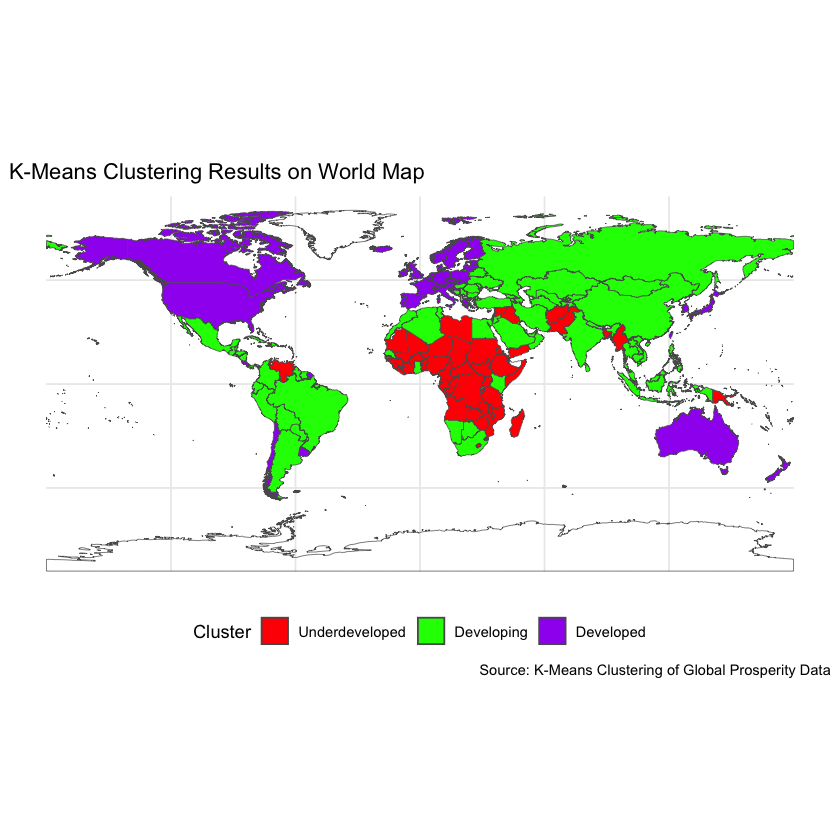

In [9]:
ggplot(data = world_data) +
  geom_sf(aes(fill = Cluster)) +
  scale_fill_manual(values = cluster_colors, name = "Cluster", na.translate = FALSE) +
  theme_minimal() +
  labs(title = "K-Means Clustering Results on World Map",
       caption = "Source: K-Means Clustering of Global Prosperity Data") +
  theme(legend.position = "bottom")

The map highlights the clustering results of the K-Means algorithm applied to the Global Prosperity Data:

- **Developed (Purple)**: These regions include North America, Western Europe, and parts of Oceania, reflecting high prosperity and well-being.
- **Developing (Green)**: Central and South America, parts of Eastern Europe, and much of Asia fall into this category, showing moderate levels of prosperity.
- **Underdeveloped (Red)**: Most of Africa and parts of South Asia are classified here, indicating lower levels of prosperity and development.

The clustering results align with the average scores presented in the [EDA notebook](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights). Developed regions correspond to higher average scores, while underdeveloped regions have lower scores. This consistency reinforces the validity of the clustering approach.